In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np 
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib widget

# Minério de Interesse
    - Grafita
        - Por quê Grafita?

# Area de Estudo

    - SF23
        - Por quê SF23?

In [2]:
def set_gdb(path=None):
    print('')
    gdb =  '/home/ggrl/geodatabase/'
    print(f' Diretório raíz: {gdb}')
    
    if path:
        gdb += path
        print(f' Diretório do Banco de Dados: {gdb}')
        
    return gdb  
# --------------------------------------------------------------------------    

def import_vector(layer=None):
    print('')
    layer = gpd.read_file(set_gdb('geodatabase.gpkg'), layer=layer)
    
    return layer
# --------------------------------------------------------------------------       

In [3]:
malha_cartor_1kk_wgs84 = import_vector('malha_cartog_1kk_wgs84')



 Diretório raíz: /home/ggrl/geodatabase/
 Diretório do Banco de Dados: /home/ggrl/geodatabase/geodatabase.gpkg


In [4]:
malha_cartor_1kk_wgs84.head()

,left,top,right,bottom,id_folha,geometry
0,-78.0,-4.0,-72.0,-8.0,SB18,"POLYGON ((-78.00000 -4.00000, -72.00000 -4.000..."
1,-78.0,-8.0,-72.0,-12.0,SC18,"POLYGON ((-78.00000 -8.00000, -72.00000 -8.000..."
2,-72.0,4.0,-66.0,0.0,NA19,"POLYGON ((-72.00000 4.00000, -66.00000 4.00000..."
3,-72.0,0.0,-66.0,-4.0,SA19,"POLYGON ((-72.00000 0.00000, -66.00000 0.00000..."
4,-72.0,-4.0,-66.0,-8.0,SB19,"POLYGON ((-72.00000 -4.00000, -66.00000 -4.000..."


In [5]:
def plot_layer(gdf=None,column=None,color=None,edgecolor=None,title=None):
    print('')
    fig, ax = plt.subplots(1, 1)
    
    gdf.plot(column=column,ax=ax, legend=True,color=color,edgecolor=edgecolor,
             legend_kwds={'loc': 'center left',
                          'bbox_to_anchor':(1,0.5),
                          'title': title})

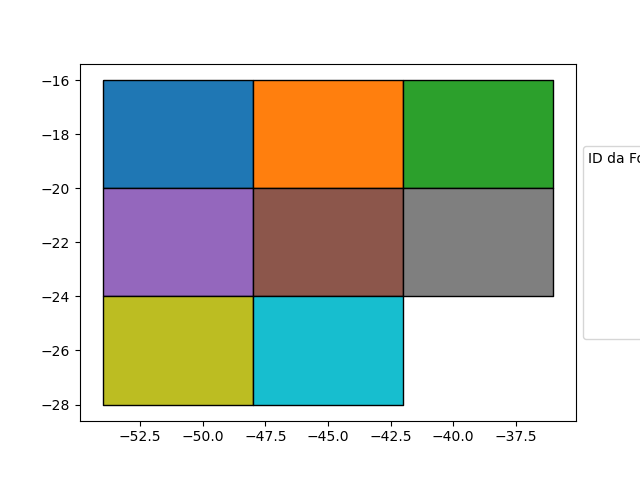

In [6]:
area = malha_cartor_1kk_wgs84.cx[-50:,-25:-20]

plot_layer(area,column='id_folha',edgecolor='black',title='ID da Folha Cartográfica')

# Geologia

In [7]:
litologia_1kk = import_vector('litologia_1kk')
litologia_1kk.head()



 Diretório raíz: /home/ggrl/geodatabase/
 Diretório do Banco de Dados: /home/ggrl/geodatabase/geodatabase.gpkg


,ID_UNIDADE,SIGLA,HIERARQUIA,NOME,AMBIENTE_T,SUB_AMBIEN,SIGLA_PAI,NOME_PAI,LEGENDA,ESCALA,...,ERA_MIN,ERA_MAX,SISTEMA_MI,SISTEMA_MA,EPOCA_MIN,EPOCA_MAX,SIGLAS_HIS,SHAPE_AREA,SHAPE_LEN,geometry
0,1506,Q1t,Unidade,Unidade Terraços fluviais,Cobertura superficial,Cobertura transportada(Clástica),Vazio,Vazio,Correspondem a amplos depósitos sedimentares c...,1:1.000.000,...,Cenozóico,Cenozóico,Neogeno,Neogeno,Superior,Superior,Vazio,0.002355,0.326835,"POLYGON ((-72.72785 -8.38730, -72.73120 -8.384..."
1,2054,K2ra,Formação,Formação Rio Azul,Vazio,Vazio,Vazio,Vazio,Folhelho cinza a castanho e arenito fino com n...,1:1.000.000,...,Mesozóico,Mesozóico,Cretáceo,Cretáceo,Inferior,Inferior,Vazio,0.005557,0.499255,"POLYGON ((-73.73806 -7.33994, -73.73616 -7.343..."
2,214,N12s,Formação,Formação Solimões,Vazio,Vazio,Vazio,Vazio,"Sedimento pelítico, flúvio lacustre, contendo ...",1:1.000.000,...,Cenozóico,Cenozóico,Neogeno,Neogeno,Superior,Superior,E2N2s,0.276915,3.847330,"MULTIPOLYGON (((-72.00000 -8.00000, -72.03095 ..."
3,1506,Q1t,Unidade,Unidade Terraços fluviais,Cobertura superficial,Cobertura transportada(Clástica),Vazio,Vazio,Correspondem a amplos depósitos sedimentares c...,1:1.000.000,...,Cenozóico,Cenozóico,Neogeno,Neogeno,Superior,Superior,Vazio,0.033780,1.492084,"POLYGON ((-72.00000 -7.25284, -72.00048 -7.253..."
4,214,N12s,Formação,Formação Solimões,Vazio,Vazio,Vazio,Vazio,"Sedimento pelítico, flúvio lacustre, contendo ...",1:1.000.000,...,Cenozóico,Cenozóico,Neogeno,Neogeno,Superior,Superior,E2N2s,2.239930,16.631079,"POLYGON ((-68.99004 -8.79511, -68.98310 -8.798..."


In [8]:
def metadataframe(GeoDataFrame):
    '''
    Recebe : 
        GeoDataFrame Object : Camadas vetoriais de unidades litoestratigráficas;
        
        Retorna :
            DataFrame Object: Planílha com metanálise das camadas vetoriais;
    '''
    print(f'# -- Gerando MetaDataFrame Litoestratigráfico')
    type_dataframe = pd.DataFrame(GeoDataFrame.dtypes)               # Describe the dtype of each column from the DataFrame or, better saying, GeoDataFrame;

    type_dataframe['Valores null']   = GeoDataFrame.isnull().sum()   # Describe the sum of each null value from our object
    type_dataframe['Valores unicos'] = GeoDataFrame.nunique()        # Describe the number of unique values from our object, that is a GeoDataFrame
    type_dataframe['Count'] = GeoDataFrame.count()
    
    meta_dataframe_litologico = type_dataframe.rename(columns = {0 : 'dType'})       # Rename the first column to 'dtype', the name of the function we used.

    print('')
    
    return meta_dataframe_litologico

In [9]:
metadataframe(litologia_1kk)

# -- Gerando MetaDataFrame Litoestratigráfico



,dType,Valores null,Valores unicos,Count
ID_UNIDADE,int64,0,2334,46715
SIGLA,object,0,2334,46715
HIERARQUIA,object,0,30,46715
NOME,object,0,2299,46715
AMBIENTE_T,object,0,10,46715
SUB_AMBIEN,object,0,29,46715
SIGLA_PAI,object,0,381,46715
NOME_PAI,object,0,381,46715
LEGENDA,object,0,2096,46715
ESCALA,object,0,1,46715


### Filtrando descrições grafitosas

# -- Gerando MetaDataFrame Litoestratigráfico

               dType  Valores null  Valores unicos  Count
ID_UNIDADE     int64             0               5     29
SIGLA         object             0               5     29
HIERARQUIA    object             0               4     29
NOME          object             0               5     29
AMBIENTE_T    object             0               2     29
SUB_AMBIEN    object             0               1     29
SIGLA_PAI     object             0               4     29
NOME_PAI      object             0               4     29
LEGENDA       object             0               5     29
ESCALA        object             0               1     29
MAPA          object             0               5     29
LITOTIPOS     object             0               5     29
RANGE         object             0               5     29
IDADE_MIN      int64             0               5     29
IDADE_MAX      int64             0               5     29
EON_MIN       object     

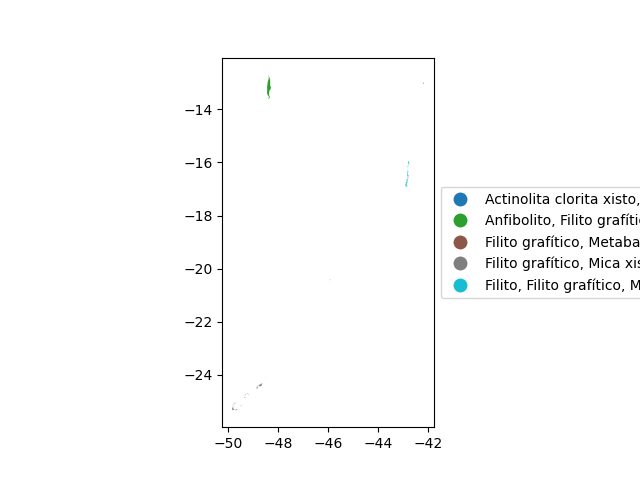

In [10]:
litotipos_grafitosos_1kk = litologia_1kk[litologia_1kk['LITOTIPOS'].str.contains('graf')]

print(metadataframe(litotipos_grafitosos_1kk))
print('')
print(f'Siglas identificadas como grafitosas: {litotipos_grafitosos_1kk.SIGLA.unique()}')
print('')

list_lito_grafitoso_1kk  = litotipos_grafitosos_1kk.LITOTIPOS.unique()
for i in list_lito_grafitoso_1kk:
    print(f' - {i}')
    

plot_layer(litotipos_grafitosos_1kk,'LITOTIPOS')

# -- Gerando MetaDataFrame Litoestratigráfico

               dType  Valores null  Valores unicos  Count
ID_UNIDADE     int64             0              70   1093
SIGLA         object             0              70   1093
HIERARQUIA    object             0              10   1093
NOME          object             0              70   1093
AMBIENTE_T    object             0               2   1093
SUB_AMBIEN    object             0               1   1093
SIGLA_PAI     object             0              30   1093
NOME_PAI      object             0              30   1093
LEGENDA       object             0              70   1093
ESCALA        object             0               1   1093
MAPA          object             0              19   1093
LITOTIPOS     object             0              70   1093
RANGE         object             0              23   1093
IDADE_MIN      int64             0              13   1093
IDADE_MAX      int64             0              14   1093
EON_MIN       object     

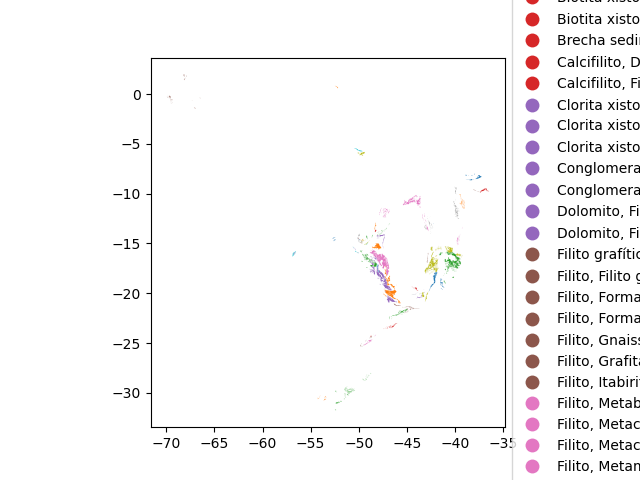

In [11]:
legenda_grafitosa_1kk = litologia_1kk[litologia_1kk['LEGENDA'].str.contains('graf')]

print(metadataframe(legenda_grafitosa_1kk))
print('')
lista_legenda_grafitosa_1kk  = legenda_grafitosa_1kk.LEGENDA.unique()
count = len(lista_legenda_grafitosa_1kk)
print(f' - {count} siglas identificadas como grafitosas: {legenda_grafitosa_1kk.SIGLA.unique()}')
print('')


count = 0

for i in lista_legenda_grafitosa_1kk:
    count+=1
    print(f'{count} - {i}')
    

plot_layer(legenda_grafitosa_1kk,'LITOTIPOS')

# -- Gerando MetaDataFrame Litoestratigráfico

               dType  Valores null  Valores unicos  Count
ID_UNIDADE     int64             0              29    380
SIGLA         object             0              29    380
HIERARQUIA    object             0               7    380
NOME          object             0              28    380
AMBIENTE_T    object             0               2    380
SUB_AMBIEN    object             0               2    380
SIGLA_PAI     object             0              17    380
NOME_PAI      object             0              17    380
LEGENDA       object             0              29    380
ESCALA        object             0               1    380
MAPA          object             0              14    380
LITOTIPOS     object             0              29    380
RANGE         object             0              14    380
IDADE_MIN      int64             0              10    380
IDADE_MAX      int64             0              11    380
EON_MIN       object     

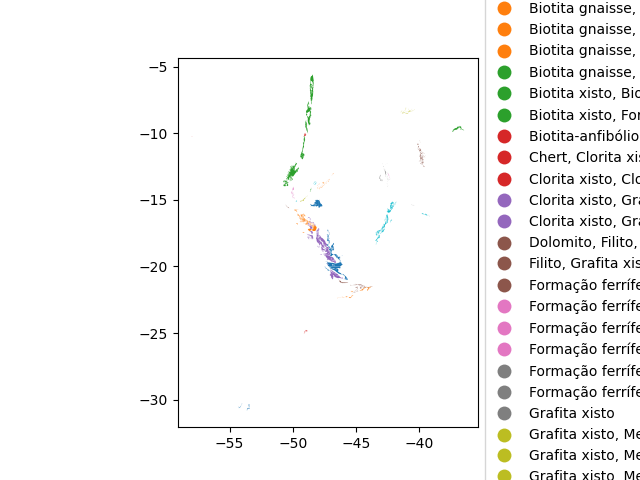

In [12]:
litotipos_grafita_xisto_1kk = litologia_1kk[litologia_1kk['LITOTIPOS'].str.contains('Graf')]

print(metadataframe(litotipos_grafita_xisto_1kk))
print('')
lista_litotipos_grafita_xisto_1kk  = litotipos_grafita_xisto_1kk.LEGENDA.unique()
count = len(lista_litotipos_grafita_xisto_1kk)
print(f' - {count} siglas identificadas como grafitosas: {litotipos_grafita_xisto_1kk.SIGLA.unique()}')
print('')


count = 0

for i in lista_litotipos_grafita_xisto_1kk:
    count+=1
    print(f'{count} - {i}')
    

plot_layer(litotipos_grafita_xisto_1kk,'LITOTIPOS')

# -- Gerando MetaDataFrame Litoestratigráfico

               dType  Valores null  Valores unicos  Count
ID_UNIDADE     int64             0               4      5
SIGLA         object             0               4      5
HIERARQUIA    object             0               3      5
NOME          object             0               4      5
AMBIENTE_T    object             0               2      5
SUB_AMBIEN    object             0               1      5
SIGLA_PAI     object             0               1      5
NOME_PAI      object             0               1      5
LEGENDA       object             0               4      5
ESCALA        object             0               1      5
MAPA          object             0               3      5
LITOTIPOS     object             0               4      5
RANGE         object             0               4      5
IDADE_MIN      int64             0               4      5
IDADE_MAX      int64             0               4      5
EON_MIN       object     

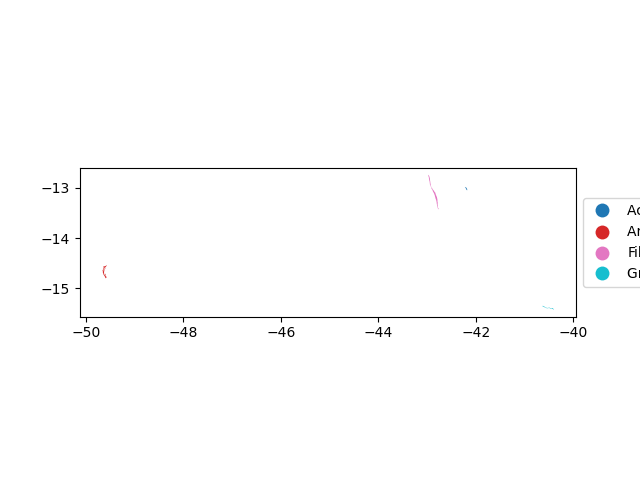

In [13]:
legenda_grafita_xisto_1kk = litologia_1kk[litologia_1kk['LEGENDA'].str.contains('Graf')]

print(metadataframe(legenda_grafita_xisto_1kk))
print('')
lista_legenda_grafita_xisto_1kk  = legenda_grafita_xisto_1kk.LEGENDA.unique()
count = len(lista_legenda_grafita_xisto_1kk)
print(f' - {count} siglas identificadas como grafitosas: {legenda_grafita_xisto_1kk.SIGLA.unique()}')
print('')


count = 0

for i in lista_legenda_grafita_xisto_1kk:
    count+=1
    print(f'{count} - {i}')
    

plot_layer(legenda_grafita_xisto_1kk,'LITOTIPOS')

In [14]:
malha_cartog_250k = import_vector('malha_cartog_250k_wgs84')
SF23_250k = malha_cartog_250k[malha_cartog_250k['id_folha'].str.contains('SF23')]



 Diretório raíz: /home/ggrl/geodatabase/
 Diretório do Banco de Dados: /home/ggrl/geodatabase/geodatabase.gpkg


In [15]:
SF23_250k

,id_folha,geometry
415,SF23_VA,"POLYGON ((-48.00000 -20.00000, -46.50000 -20.0..."
416,SF23_VC,"POLYGON ((-48.00000 -21.00000, -46.50000 -21.0..."
417,SF23_YA,"POLYGON ((-48.00000 -22.00000, -46.50000 -22.0..."
418,SF23_YC,"POLYGON ((-48.00000 -23.00000, -46.50000 -23.0..."
441,SF23_VB,"POLYGON ((-46.50000 -20.00000, -45.00000 -20.0..."
442,SF23_VD,"POLYGON ((-46.50000 -21.00000, -45.00000 -21.0..."
443,SF23_YB,"POLYGON ((-46.50000 -22.00000, -45.00000 -22.0..."
444,SF23_YD,"POLYGON ((-46.50000 -23.00000, -45.00000 -23.0..."
465,SF23_XA,"POLYGON ((-45.00000 -20.00000, -43.50000 -20.0..."
466,SF23_XC,"POLYGON ((-45.00000 -21.00000, -43.50000 -21.0..."


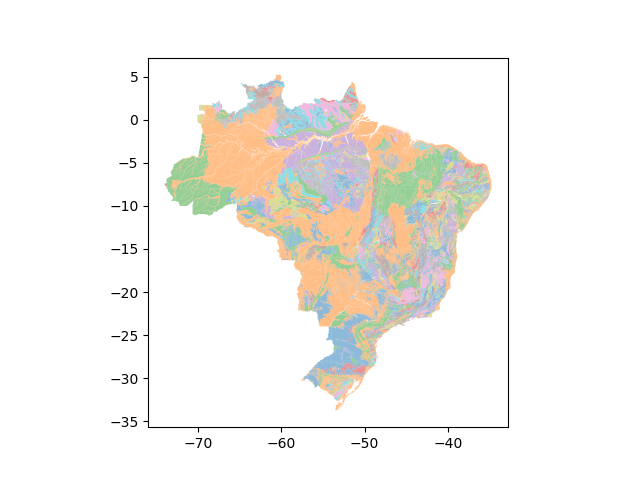

In [16]:
base = litologia_1kk.plot('LITOTIPOS',alpha=.5)

In [17]:
socorro_250k = gpd.read_file('/home/ggrl/geodatabase/shapefiles/socorro.shp')

socorro = socorro_250k.set_crs(crs='EPSG:4326',allow_override=True)

In [18]:
socorro.plot(ax=base,color='black')


<AxesSubplot:>

In [19]:
SF23_250k.boundary.plot(ax=base,color='black')

litotipos_grafitosos_1kk.plot(ax=base,color='red')
legenda_grafita_xisto_1kk.plot(ax=base,color='red')
litotipos_grafita_xisto_1kk.plot(ax=base,color='red')
legenda_grafitosa_1kk.plot(ax=base,color='red')

<AxesSubplot:>

In [20]:
SF23_VC = SF23_250k[SF23_250k['id_folha'].str.contains('SF23_VD')]

SF23_VC.boundary.plot(ax=base,color='Red')

<AxesSubplot:>

# Aerogefísica

## Lendo dados brutos

In [21]:
path = set_gdb('xyz/1105_GamaLine.XYZ')

gama_line_1105_cols = 'KB DATA BARO UB THB COSMICO CTB UUP ALTURA KPERC eU eTH CTEXP UTHRAZAO X Y UKRAZAO MDT THKRAZAO LIVE_TIME CTCOR KCOR THCOR UCOR HORA GPSALT LATITUDE FIDUCIAL TEMP LONGITUDE'.split(" ")             


df = pd.read_csv(path,
                         names=gama_line_1105_cols,
                         delim_whitespace=True,
                         skiprows=10,                                     # Linhas de cabeçalho
                         usecols=["X","Y","LATITUDE","LONGITUDE",
                                  "KPERC","eU","eTH","CTCOR",
                                  "THKRAZAO","UTHRAZAO","UKRAZAO","MDT"])
                                  


 Diretório raíz: /home/ggrl/geodatabase/
 Diretório do Banco de Dados: /home/ggrl/geodatabase/xyz/1105_GamaLine.XYZ


In [22]:
df.dropna(inplace=True)

## Gamaespectrometria

In [23]:
def import_xyz(path):
    xyz = pd.read_csv(set_gdb(path))
    return xyz

In [24]:
gama_line_1105 = import_xyz('geof/gama_line_1105')


 Diretório raíz: /home/ggrl/geodatabase/
 Diretório do Banco de Dados: /home/ggrl/geodatabase/geof/gama_line_1105


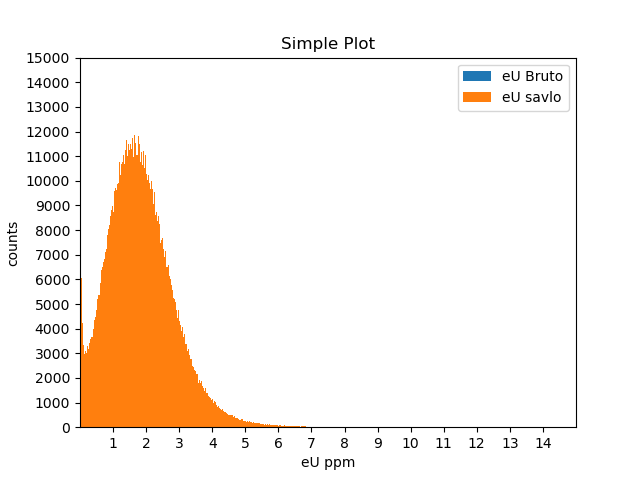

In [25]:
fig,ax = plt.subplots()

ax.hist(df.eU,bins = 1000,label='eU Bruto')
ax.hist(gama_line_1105.eU, bins=1000, label='eU savlo')

ax.set(xlim=(0, 15), xticks=np.arange(1, 15),
       ylim=(0, 15000), yticks=np.linspace(0, 15000, 16))

ax.set_xlabel('eU ppm')  # Add an x-label to the axes.
ax.set_ylabel('counts')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

plt.show()

### Removendo valores negativos na gamaespectrometria

In [26]:
gama_line_1105.rename(columns={'eTH':'eTh'},inplace=True)

In [27]:
df = gama_line_1105

In [28]:
df['K_pos'] = df['KPERC'] - df['KPERC'].min() + 0.01
df['eU_pos'] = df['eU'] - df['eU'].min() + 0.01
df['eTh_pos'] = df['eTh'] - df['eTh'].min() + 0.01

#excluindo os canais originais
df.drop(['KPERC','eU','eTh'], axis =1, inplace = True)

#renomeando os positivos para os nomes dos originais
df.rename(columns={'K_pos':'K','eU_pos':'eU','eTh_pos':'eTh','LATITUDE':'LAT_WGS','LONGITUDE':'LONG_WGS'}, inplace=True)
#df = df[['ASA', 'CT', 'eTh','eU','K','MDT','X','Y']] #organizando para ficar como os anteriores
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UTHRAZAO,1169659.0,9.712634e-02,0.042352,0.000000e+00,7.300000e-02,9.000000e-02,1.110000e-01,2.669000e+00
X,1169659.0,4.575283e+05,77602.463955,2.928693e+05,3.973806e+05,4.538819e+05,5.148813e+05,6.029624e+05
Y,1169659.0,7.487793e+06,58446.885346,7.343516e+06,7.442703e+06,7.486884e+06,7.533741e+06,7.637622e+06
UKRAZAO,1169659.0,2.716171e+00,2.416952,4.200000e-02,1.300000e+00,1.911000e+00,3.302000e+00,5.900700e+01
MDT,1169659.0,8.726750e+02,408.562445,-4.100000e+00,6.415200e+02,8.876800e+02,1.113550e+03,2.751590e+03
THKRAZAO,1169659.0,2.950558e+01,25.788561,7.980000e-01,1.479300e+01,2.074100e+01,3.479100e+01,5.258590e+02
CTCOR,1169659.0,1.417662e+01,10.738090,-1.157500e+01,6.608000e+00,1.126300e+01,1.969900e+01,2.466000e+02
LAT_WGS,1169659.0,-2.271483e+01,0.529062,-2.401597e+01,-2.312331e+01,-2.272362e+01,-2.229940e+01,-2.135328e+01
LONG_WGS,1169659.0,-4.541301e+01,0.754108,-4.699901e+01,-4.600130e+01,-4.545014e+01,-4.485487e+01,-4.400071e+01
K,1169659.0,1.469790e+00,0.854709,1.000000e-02,8.920000e-01,1.267000e+00,1.816000e+00,1.508700e+01


In [29]:
df = df[['CTCOR','K','eU','eTh','THKRAZAO','UKRAZAO','UTHRAZAO','X','Y','LAT_WGS','LONG_WGS']]
df.head()

,CTCOR,K,eU,eTh,THKRAZAO,UKRAZAO,UTHRAZAO,X,Y,LAT_WGS,LONG_WGS
0,23.0,1.53,1.62,17.058,9.86,0.9,0.1,292878.15,7624109.00,-21.473638,-46.998997
1,24.2,1.98,1.60,17.588,9.77,0.8,0.1,292876.59,7624190.38,-21.472903,-46.999002
2,25.3,2.33,1.66,19.028,9.81,0.8,0.1,292875.03,7624271.94,-21.472167,-46.999007
3,25.5,2.03,1.73,18.998,9.96,0.7,0.1,292874.16,7624353.33,-21.471432,-46.999005
4,24.5,1.85,1.66,17.168,10.18,0.7,0.1,292873.81,7624434.72,-21.470697,-46.998998


In [30]:
df['KeTh'] = df.K/df.eTh
df['eUeTh'] = df.eU/df.eTh
df['FF'] = df.K * df.eU / df.eTh

In [31]:
df.describe(percentiles=(0.05,0.1,0.25,0.5,0.75,0.995)).T

,count,mean,std,min,5%,10%,25%,50%,75%,99.5%,max
CTCOR,1169659.0,1.417662e+01,10.738090,-1.157500e+01,1.843000e+00,3.814000e+00,6.608000e+00,1.126300e+01,1.969900e+01,5.654200e+01,2.466000e+02
K,1169659.0,1.469790e+00,0.854709,1.000000e-02,5.170000e-01,5.950000e-01,8.920000e-01,1.267000e+00,1.816000e+00,5.040000e+00,1.508700e+01
eU,1169659.0,2.246779e+00,1.092923,1.000000e-02,5.140000e-01,8.350000e-01,1.518000e+00,2.183000e+00,2.883000e+00,5.893000e+00,2.444400e+01
eTh,1169659.0,2.334705e+01,11.065808,1.000000e-02,4.178000e+00,1.091800e+01,1.634800e+01,2.244000e+01,2.926500e+01,6.321400e+01,2.455320e+02
THKRAZAO,1169659.0,2.950558e+01,25.788561,7.980000e-01,8.026000e+00,1.000400e+01,1.479300e+01,2.074100e+01,3.479100e+01,1.627167e+02,5.258590e+02
UKRAZAO,1169659.0,2.716171e+00,2.416952,4.200000e-02,6.130000e-01,8.190000e-01,1.300000e+00,1.911000e+00,3.302000e+00,1.490200e+01,5.900700e+01
UTHRAZAO,1169659.0,9.712634e-02,0.042352,0.000000e+00,4.700000e-02,5.600000e-02,7.300000e-02,9.000000e-02,1.110000e-01,2.790000e-01,2.669000e+00
X,1169659.0,4.575283e+05,77602.463955,2.928693e+05,3.298776e+05,3.523964e+05,3.973806e+05,4.538819e+05,5.148813e+05,6.013729e+05,6.029624e+05
Y,1169659.0,7.487793e+06,58446.885346,7.343516e+06,7.396173e+06,7.410280e+06,7.442703e+06,7.486884e+06,7.533741e+06,7.632773e+06,7.637622e+06
LAT_WGS,1169659.0,-2.271483e+01,0.529062,-2.401597e+01,-2.354287e+01,-2.341627e+01,-2.312331e+01,-2.272362e+01,-2.229940e+01,-2.139814e+01,-2.135328e+01


In [32]:
df.shape

(1169659, 14)

In [33]:
def
fig,ax = plt.subplots()

ax.hist(df.eU,bins = 10000,label='eU Bruto')
#ax.hist(gama_line_1105.eU, bins=10000, label='eU savlo')

ax.set(xlim=(0, 15), xticks=np.arange(1, 15),
       ylim=(0, 10000), yticks=np.linspace(0, 10000, 16))

ax.set_xlabel('eU ppm')  # Add an x-label to the axes.
ax.set_ylabel('counts')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

plt.show()

SyntaxError: invalid syntax (2510904191.py, line 1)

In [ ]:
import verde as vd

In [ ]:
vd.get_region()

## Magnetometria

In [ ]:
mag_3022 = pd.read_csv(set_gdb('geof/mag_3022'))

In [ ]:
mag_3022

In [ ]:
metadataframe(mag_3022)